In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\rishi\Documents\Python_Learning\PyTorch_Learning\Different_Models\Learning_Cool\Dataset\medical_conditions_dataset.csv")

In [3]:
display(df)

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
1,2,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic
2,3,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,4,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
4,5,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic
...,...,...,...,...,...,...,...,...,...
9995,9996,User9996,NaN,male,Non-Smoker,25.029002,152.540355,137.551451,Pneumonia
9996,9997,User9997,NaN,male,Non-Smoker,27.017487,NaN,NaN,Diabetic
9997,9998,User9998,23.0,male,Smoker,NaN,148.833321,173.931480,Pneumonia
9998,9999,User9999,NaN,female,Non-Smoker,NaN,NaN,NaN,Pneumonia


## Different Medical Conditions:

In [4]:
unique_conditions = df['condition'].unique()

In [5]:
for i in unique_conditions:
    print(i)

Pneumonia
Diabetic
Cancer


## Smokers Vs Non-Smokers having Pneumonia

In [7]:
pneumonia_smoking = df[df['condition']=='Pneumonia']['smoking_status'].value_counts()
print(pneumonia_smoking)

Non-Smoker    2281
Smoker         246
Name: smoking_status, dtype: int64


(-1.1048060900151089,
 1.1002288664385727,
 -1.107562599684176,
 1.1070396007973433)

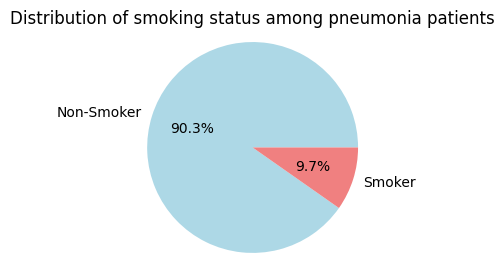

In [11]:
# Create a Pie chart
plt.figure(figsize=(3,3))
plt.pie(pneumonia_smoking.values,
       labels=pneumonia_smoking.index,
       autopct='%1.1f%%',
       colors=['lightblue','lightcoral'])

plt.title('Distribution of smoking status among pneumonia patients')
plt.axis('equal')

In [14]:
diabetic_smoking = df[df['condition']=='Diabetic']['smoking_status'].value_counts()
print(diabetic_smoking)

Non-Smoker    5410
Smoker         603
Name: smoking_status, dtype: int64


(-1.1039748735622763,
 1.1001892796934418,
 -1.1075999896483095,
 1.1067964378274426)

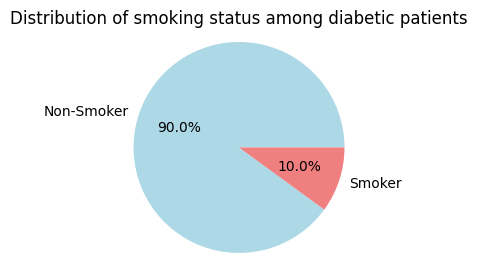

In [20]:
# Create a Pie chart
plt.figure(figsize=(3,3))
plt.pie(diabetic_smoking.values,
       labels=diabetic_smoking.index,
       autopct='%1.1f%%',
       colors=['lightblue','lightcoral'])

plt.title('Distribution of smoking status among diabetic patients')
plt.axis('equal')

In [23]:
cancer_smoking = df[df['condition']=='Cancer']['smoking_status'].value_counts()
print(cancer_smoking)

Non-Smoker    1323
Smoker         137
Name: smoking_status, dtype: int64


(-1.1056631781506638,
 1.1002696896335709,
 -1.107188243848315,
 1.1072807332458774)

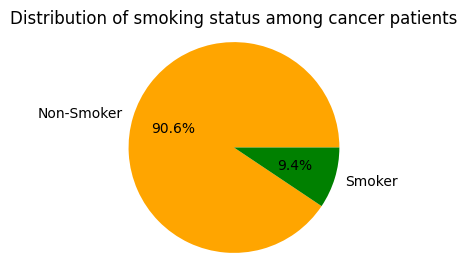

In [26]:
# Create a Pie chart
plt.figure(figsize=(3,3))
plt.pie(cancer_smoking.values,
       labels = cancer_smoking.index,
       autopct='%1.1f%%',
       colors=['orange','green'])

plt.title('Distribution of smoking status among cancer patients')
plt.axis('equal')

## Blood Pressure, Age and BMI Relation

In [80]:
def categorize_bp(bp):
    if pd.isna(bp):  # Handle NaN values
        return 'Unknown'
    elif bp > 120:
        return 'High BP'
    else:
        return 'Low BP'

# Define non-ideal BMI (typically BMI < 18.5 or > 24.9 is considered non-ideal)
def is_non_ideal_bmi(bmi):
    if pd.isna(bmi):  
        return False
    return bmi < 18.5 or bmi > 24.9

def categorize_glucose(glucose):
    if pd.isna(glucose):
        return 'Unknown'
    elif glucose>140:
        return 'High Glucose'
    else:
        return 'Normal Glucose'

In [87]:
filtered_df = df[
    (df['smoking_status'] == 'Smoker') &  # Must be smoker
    (df['age'] > 30) &                    # Age > 45
    df['bmi'].apply(is_non_ideal_bmi)     # Non-ideal BMI
]

In [88]:
# Create blood pressure categories
filtered_df['bp_category'] = filtered_df['blood_pressure'].apply(categorize_bp)

# Count the blood pressure categories
bp_distribution = filtered_df['bp_category'].value_counts()
bp_distribution = bp_distribution[bp_distribution.index != 'Unknown']

C:\Users\rishi\venvP\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(-1.1139925436246232,
 1.1006663116011726,
 -1.1173743551354827,
 1.1099968686414343)

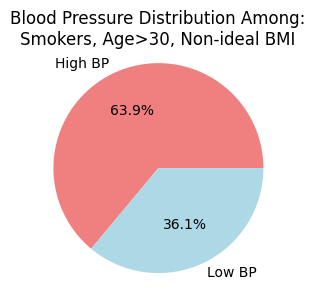

In [89]:
# Create pie chart
plt.figure(figsize=(3, 3))
plt.pie(bp_distribution.values,
        labels=bp_distribution.index,
        autopct='%1.1f%%',
        colors=['lightcoral', 'lightblue', 'lightgrey'])

plt.title('Blood Pressure Distribution Among:\nSmokers, Age>30, Non-ideal BMI')
plt.axis('equal')

In [90]:
filtered_df = df[
    (df['smoking_status'] == 'Smoker') &  
    (df['age'] > 30) &                    
    df['bmi'].apply(is_non_ideal_bmi)     
]

# Create glucose level categories
filtered_df['glucose_category'] = filtered_df['glucose_levels'].apply(categorize_glucose)

C:\Users\rishi\venvP\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
# Count the glucose level categories and remove Unknown
glucose_distribution = filtered_df['glucose_category'].value_counts()
glucose_distribution = glucose_distribution[glucose_distribution.index != 'Unknown']

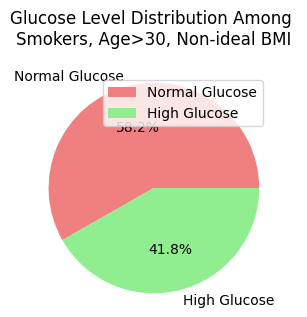

In [92]:
plt.figure(figsize=(3,3))
plt.pie(glucose_distribution.values,
       labels=glucose_distribution.index,
       autopct='%1.1f%%',
       colors=['lightcoral','lightgreen'])

plt.title('Glucose Level Distribution Among \nSmokers, Age>30, Non-ideal BMI\n')
plt.axis('equal')
plt.legend()
plt.show()

In [93]:
## Pneumonia Vs Diabetic Vs Cancer who smokes, have non-ideal bmi and have non-ideal glucose

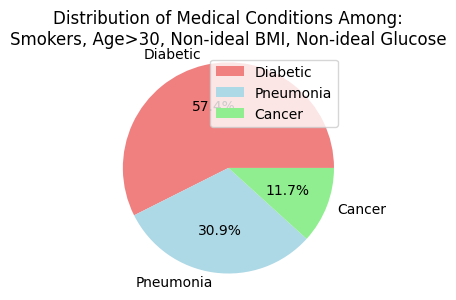


Distribution counts:
Diabetic     93
Pneumonia    50
Cancer       19
Name: condition, dtype: int64

Total patients meeting all criteria: 162


In [96]:
# Filter the data based on all conditions
filtered_df = df[
    (df['smoking_status'] == 'Smoker') &  
    (df['age'] > 30) &                    
    df['bmi'].apply(is_non_ideal_bmi) &
    df['glucose_levels'].apply(categorize_glucose)
]

# Count the conditions
condition_distribution = filtered_df['condition'].value_counts()

# Create pie chart
plt.figure(figsize=(3, 3))
plt.pie(condition_distribution.values,
        labels=condition_distribution.index,
        autopct='%1.1f%%',
        colors=['lightcoral', 'lightblue', 'lightgreen'])

plt.title('Distribution of Medical Conditions Among:\nSmokers, Age>30, Non-ideal BMI, Non-ideal Glucose')
plt.axis('equal')

# Add legend
plt.legend()

# Show plot
plt.show()

# Print the actual numbers
print("\nDistribution counts:")
print(condition_distribution)

# Print total number of patients meeting the criteria
print(f"\nTotal patients meeting all criteria: {len(filtered_df)}")

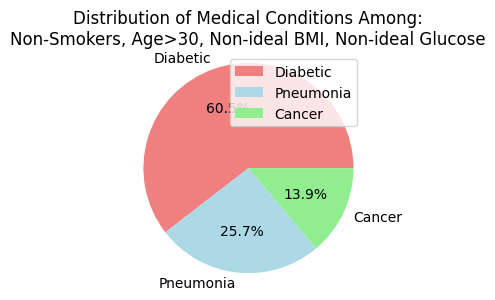


Distribution counts:
Diabetic     834
Pneumonia    354
Cancer       191
Name: condition, dtype: int64

Total patients meeting all criteria: 1379


In [98]:
# Filter the data based on all conditions
filtered_df = df[
    (df['smoking_status'] == 'Non-Smoker') &  
    (df['age'] > 30) &                    
    df['bmi'].apply(is_non_ideal_bmi) &
    df['glucose_levels'].apply(categorize_glucose)
]

# Count the conditions
condition_distribution = filtered_df['condition'].value_counts()

# Create pie chart
plt.figure(figsize=(3, 3))
plt.pie(condition_distribution.values,
        labels=condition_distribution.index,
        autopct='%1.1f%%',
        colors=['lightcoral', 'lightblue', 'lightgreen'])

plt.title('Distribution of Medical Conditions Among:\nNon-Smokers, Age>30, Non-ideal BMI, Non-ideal Glucose')
plt.axis('equal')

# Add legend
plt.legend()

# Show plot
plt.show()

# Print the actual numbers
print("\nDistribution counts:")
print(condition_distribution)

# Print total number of patients meeting the criteria
print(f"\nTotal patients meeting all criteria: {len(filtered_df)}")

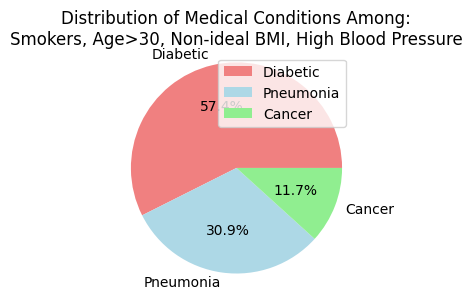


Distribution counts:
Diabetic     93
Pneumonia    50
Cancer       19
Name: condition, dtype: int64

Total patients meeting all criteria: 162


In [104]:
# Filter the data based on all conditions
filtered_df = df[
    (df['smoking_status'] == 'Smoker') &  
    (df['age'] > 30) &                    
    df['bmi'].apply(is_non_ideal_bmi) &
    (df['blood_pressure'].apply(categorize_bp)) &
    df['glucose_levels'].apply(categorize_glucose)
]

# Count the conditions
condition_distribution = filtered_df['condition'].value_counts()

# Create pie chart
plt.figure(figsize=(3, 3))
plt.pie(condition_distribution.values,
        labels=condition_distribution.index,
        autopct='%1.1f%%',
        colors=['lightcoral', 'lightblue', 'lightgreen'])

plt.title('Distribution of Medical Conditions Among:\nSmokers, Age>30, Non-ideal BMI, High Blood Pressure')
plt.axis('equal')

# Add legend
plt.legend()

# Show plot
plt.show()

# Print the actual numbers
print("\nDistribution counts:")
print(condition_distribution)

# Print total number of patients meeting the criteria
print(f"\nTotal patients meeting all criteria: {len(filtered_df)}")